In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
file_path = '/content/drive/My Drive/Datasets/starbucks.csv'
data = pd.read_csv(file_path)

# Overview of the dataset

In [4]:

print(data.head())

   ID Promotion  purchase  V1         V2        V3  V4  V5  V6  V7
0   1        No         0   2  30.443518 -1.165083   1   1   3   2
1   3        No         0   3  32.159350 -0.645617   2   3   2   2
2   4        No         0   2  30.431659  0.133583   1   1   4   2
3   5        No         0   0  26.588914 -0.212728   2   1   4   2
4   8       Yes         0   3  28.044331 -0.385883   1   1   2   2


# Incremental Response Rate (IRR)

> Add blockquote



In [ ]:

def calculate_irr(data):
    treatment_group = data[data['Promotion'] == 1]
    control_group = data[data['Promotion'] == 0]

    # Purchasers in treatment and control groups
    purch_treat = treatment_group['purchase'].sum()
    cust_treat = treatment_group.shape[0]
    purch_ctrl = control_group['purchase'].sum()
    cust_ctrl = control_group.shape[0]

    # Incremental Response Rate (IRR)
    irr = (purch_treat / cust_treat) - (purch_ctrl / cust_ctrl)
    return irr

irr = calculate_irr(data)
print(f"Incremental Response Rate (IRR): {irr}")

Incremental Response Rate (IRR): nan


<ipython-input-12-e8c5f65a9e30>:13: RuntimeWarning: invalid value encountered in scalar divide
  irr = (purch_treat / cust_treat) - (purch_ctrl / cust_ctrl)


#  Net Incremental Revenue (NIR)

In [ ]:

def calculate_nir(data):
    treatment_group = data[data['Promotion'] == 1]
    control_group = data[data['Promotion'] == 0]

    # Purchasers in treatment and control groups
    purch_treat = treatment_group['purchase'].sum()
    cust_treat = treatment_group.shape[0]
    purch_ctrl = control_group['purchase'].sum()

    # Net Incremental Revenue (NIR)
    nir = (10 * purch_treat - 0.15 * cust_treat) - (10 * purch_ctrl)
    return nir

nir = calculate_nir(data)
print(f"Net Incremental Revenue (NIR): {nir}")


Net Incremental Revenue (NIR): 0.0


Splitting of Data

In [ ]:

X = data[['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7']]  # Features
y = data['purchase']  # Target variable (purchase)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

Model Building

In [ ]:

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

Model Prediction

In [ ]:

y_pred = rf_model.predict(X_val)

Model Evaluation

In [ ]:

accuracy = accuracy_score(y_val, y_pred)
print(f"Validation Accuracy: {accuracy}")

Validation Accuracy: 0.9869284911575087


Confusion Matrix:
[[16686    13]
 [  208     0]]


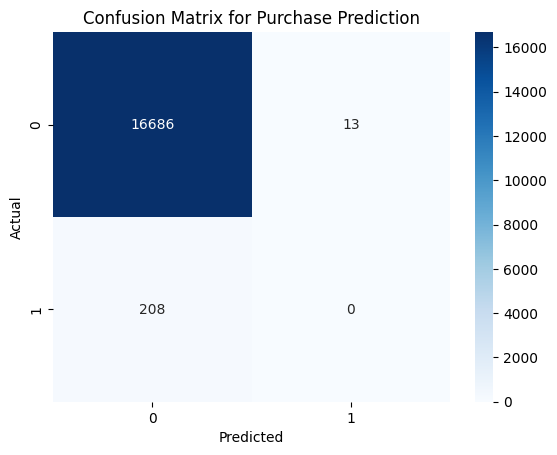

In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_val, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Visualizing Confusion Matrix
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix for Purchase Prediction')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


Model Scoring

In [ ]:
# Scoring the Test.csv to select best customers
file_path = '/content/drive/My Drive/Datasets/Test.csv'
test_data = pd.read_csv(file_path)

X_test = test_data[['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7']]
test_data['Purchase_Prob'] = rf_model.predict_proba(X_test)[:, 1]

Customers With Highest Probability Of Purchase

In [ ]:

selected_customers = test_data[test_data['Purchase_Prob'] > 0.5]['ID']
selected_customers.to_csv("Selected_Customers.csv", index=False)
print("Customer IDs saved to Selected_Customers.csv")


Customer IDs saved to Selected_Customers.csv


Summary Of Approach

In [ ]:

with open("summary.txt", "w") as file:
    file.write("Approach used:\n")
    file.write("1. Calculated IRR and NIR to measure promotion effectiveness.\n")
    file.write("2. Built a RandomForestClassifier model to predict purchases.\n")
    file.write("3. Selected customers from test data with highest purchase probability.\n")